# Desription

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. <br>

**Content : There are 25 variables:**

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)


**Goal :** The goal of this project is to create a model that will allow us to decide whether a client might have a payment default next month or not

# LOADING PACKAGES

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import pprint
import scipy.stats as stats

# EXPLORATORY DATA ANALYSIS

## Loading data

In [2]:
path = "D://TRAININGS//FORMATION RISK//SCORE OCTROI//data//"

data = pd.read_csv(path+'UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

**Comment :** All variables are numeric. Some are discrete (SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6), and the other ones are continuous (LIMIT_BAL, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6)

In [4]:
#Rename the target variable

data.rename(columns={'default.payment.next.month': 'DEFAULT'}, inplace=True)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

## Analysis of the target variable : DEFAULT

In [7]:
# Checking missing data in the default column
data['DEFAULT'].isnull()[data['DEFAULT'].isnull() == True]

Series([], Name: DEFAULT, dtype: bool)

The ‘default’ column has no missing data

In [8]:
pd.crosstab(data['DEFAULT'], "DEFAULT")

col_0,DEFAULT
DEFAULT,
0,23364
1,6636


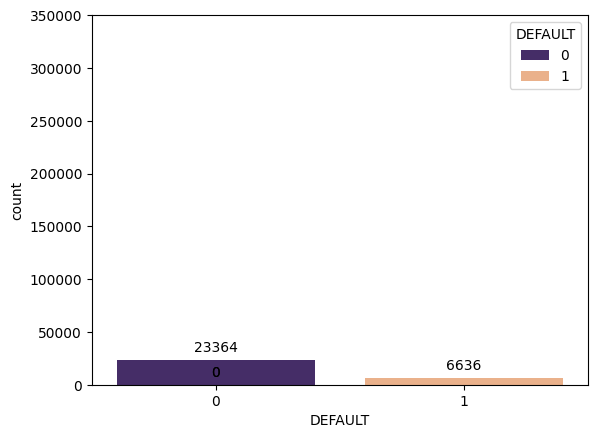

In [9]:
ax = sns.countplot(data, x="DEFAULT", hue = "DEFAULT", order = [0, 1], palette=['#432371',"#FAAE7B"])
ax.set_ylim(0, 350000)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

The default rate is **22.12%**

In [10]:
#In the following, the default variable will be converted into a qualitative variable

data['DEFAULT'] = data['DEFAULT'].astype("str")
data['DEFAULT'].dtype

dtype('O')

## Discrete variables analysis

In [11]:
for col in ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"] : 
    data[col] = data[col].astype("str")

data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0         object
PAY_2         object
PAY_3         object
PAY_4         object
PAY_5         object
PAY_6         object
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT       object
dtype: object

In [12]:
qual_data = data[["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
qual_data

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0
29996,1,3,2,-1,-1,-1,-1,0,0
29997,1,2,2,4,3,2,-1,0,0
29998,1,3,1,1,-1,0,0,0,-1


In [13]:
qual_data.describe()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10
top,2,2,2,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286


In [14]:
for col in qual_data.columns: 
    print(f"Number of nan values in {col} = {int(data[col].isna().sum())}")

Number of nan values in SEX = 0
Number of nan values in EDUCATION = 0
Number of nan values in MARRIAGE = 0
Number of nan values in PAY_0 = 0
Number of nan values in PAY_2 = 0
Number of nan values in PAY_3 = 0
Number of nan values in PAY_4 = 0
Number of nan values in PAY_5 = 0
Number of nan values in PAY_6 = 0


****************************************************VARIABLE SEX****************************************************
  SEX  count   percent
0   2  18112  0.603733
1   1  11888  0.396267


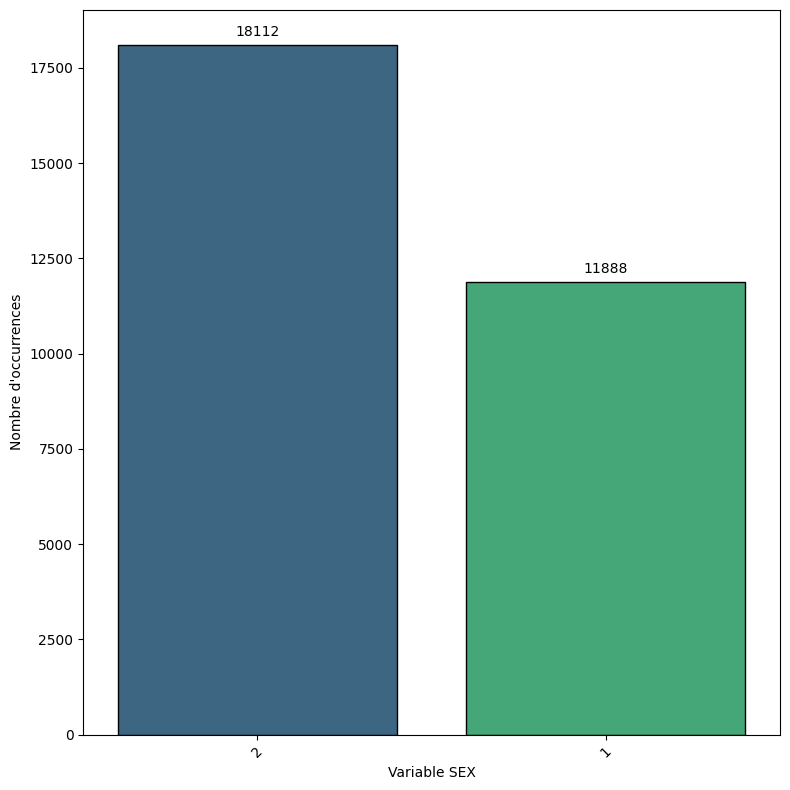

Le mode de cette variable est 2



****************************************************VARIABLE EDUCATION****************************************************
  EDUCATION  count   percent
0         2  14030  0.467667
1         1  10585  0.352833
2         3   4917    0.1639
3         5    280  0.009333
4         4    123    0.0041
5         6     51    0.0017
6         0     14  0.000467


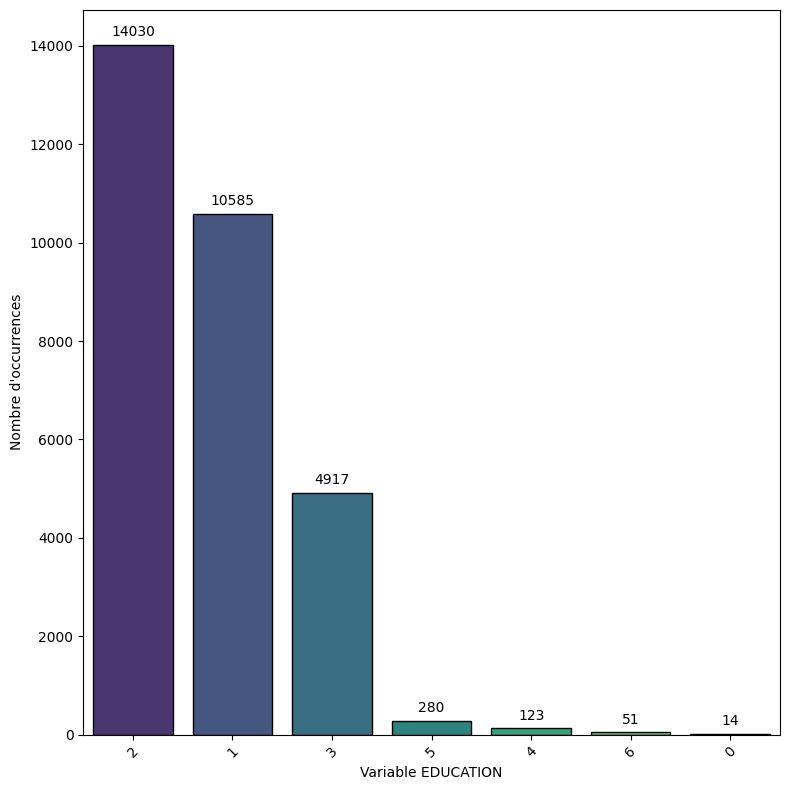

Le mode de cette variable est 2



****************************************************VARIABLE MARRIAGE****************************************************
  MARRIAGE  count   percent
0        2  15964  0.532133
1        1  13659    0.4553
2        3    323  0.010767
3        0     54    0.0018


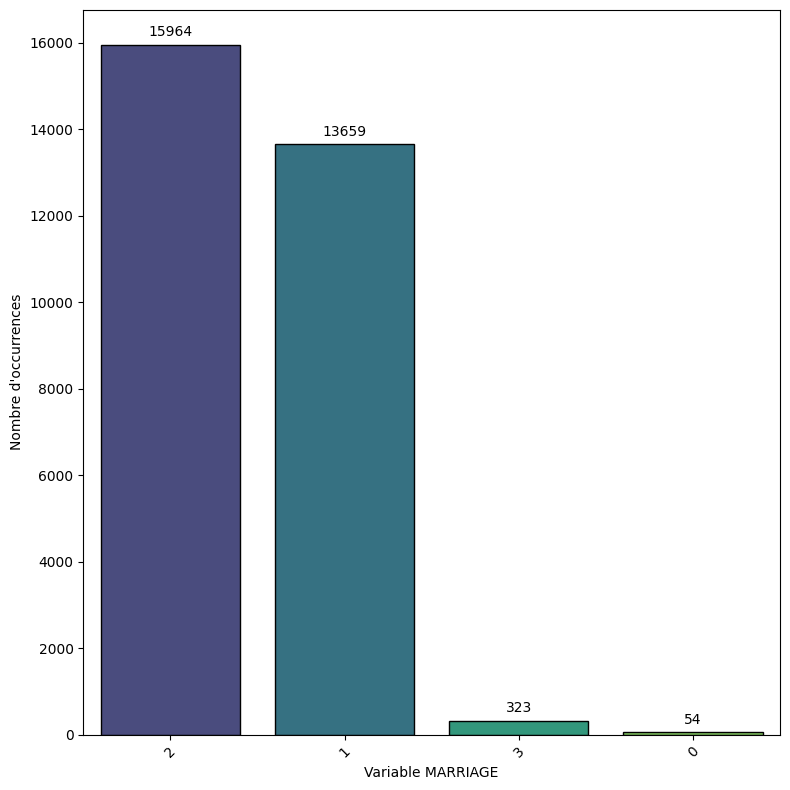

Le mode de cette variable est 2



****************************************************VARIABLE PAY_0****************************************************
   PAY_0  count   percent
0      0  14737  0.491233
1     -1   5686  0.189533
2      1   3688  0.122933
3     -2   2759  0.091967
4      2   2667    0.0889
5      3    322  0.010733
6      4     76  0.002533
7      5     26  0.000867
8      8     19  0.000633
9      6     11  0.000367
10     7      9    0.0003


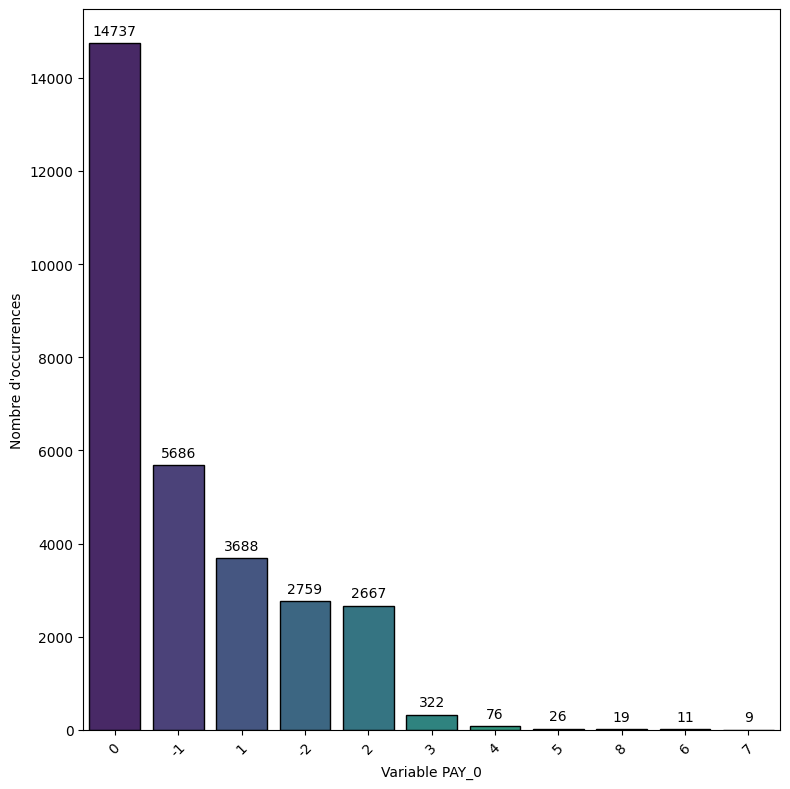

Le mode de cette variable est 0



****************************************************VARIABLE PAY_2****************************************************
   PAY_2  count   percent
0      0  15730  0.524333
1     -1   6050  0.201667
2      2   3927    0.1309
3     -2   3782  0.126067
4      3    326  0.010867
5      4     99    0.0033
6      1     28  0.000933
7      5     25  0.000833
8      7     20  0.000667
9      6     12    0.0004
10     8      1  0.000033


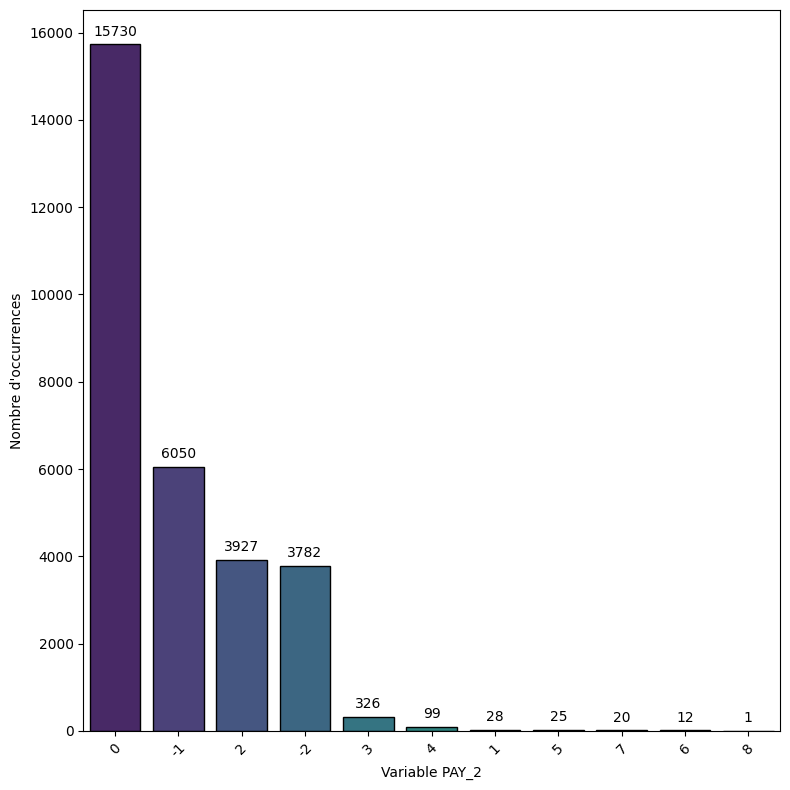

Le mode de cette variable est 0



****************************************************VARIABLE PAY_3****************************************************
   PAY_3  count   percent
0      0  15764  0.525467
1     -1   5938  0.197933
2     -2   4085  0.136167
3      2   3819    0.1273
4      3    240     0.008
5      4     76  0.002533
6      7     27    0.0009
7      6     23  0.000767
8      5     21    0.0007
9      1      4  0.000133
10     8      3    0.0001


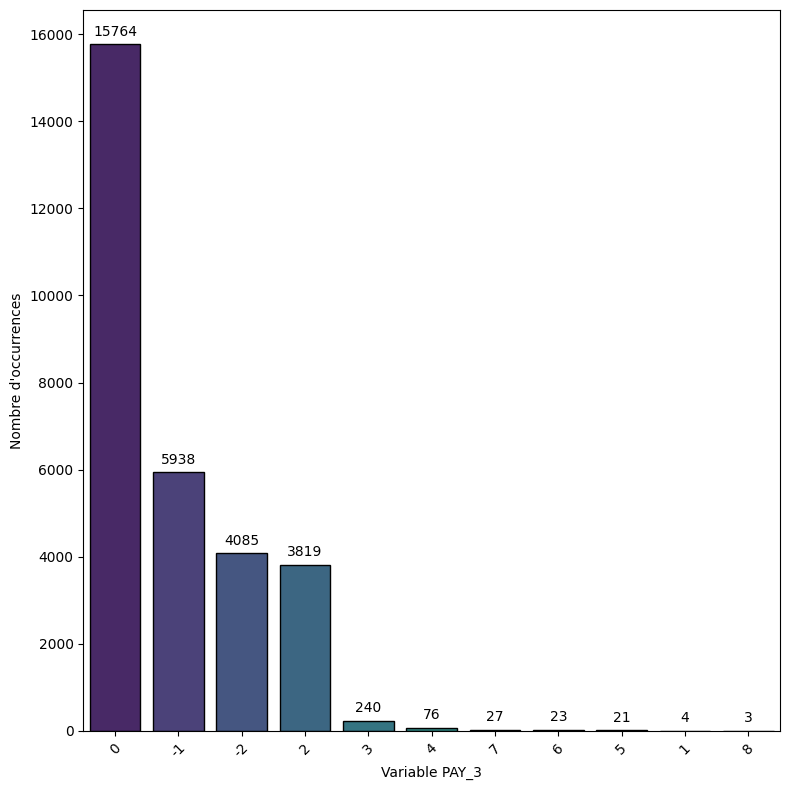

Le mode de cette variable est 0



****************************************************VARIABLE PAY_4****************************************************
   PAY_4  count   percent
0      0  16455    0.5485
1     -1   5687  0.189567
2     -2   4348  0.144933
3      2   3159    0.1053
4      3    180     0.006
5      4     69    0.0023
6      7     58  0.001933
7      5     35  0.001167
8      6      5  0.000167
9      1      2  0.000067
10     8      2  0.000067


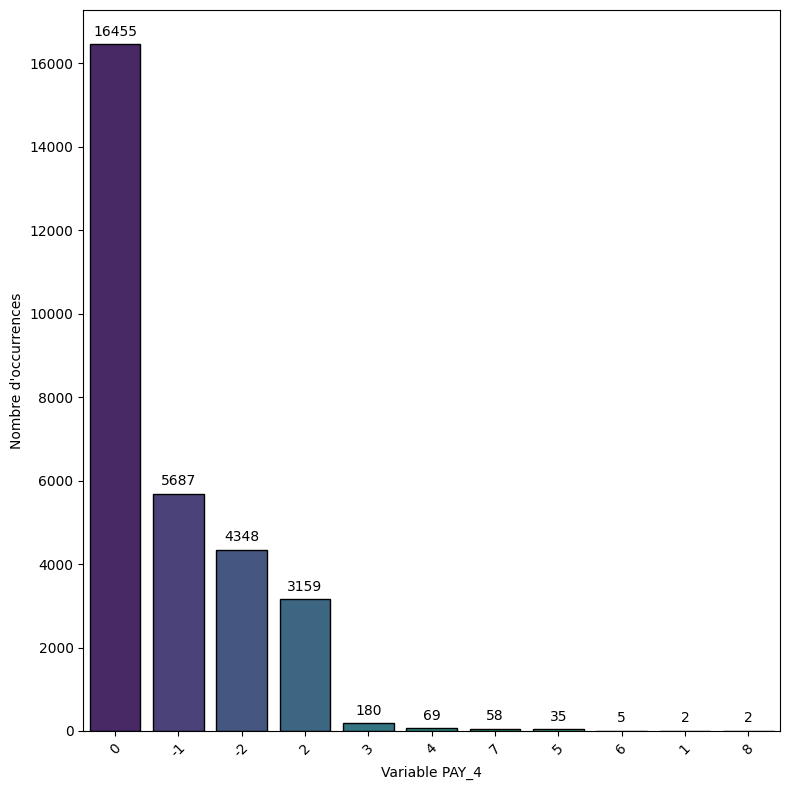

Le mode de cette variable est 0



****************************************************VARIABLE PAY_5****************************************************
  PAY_5  count   percent
0     0  16947    0.5649
1    -1   5539  0.184633
2    -2   4546  0.151533
3     2   2626  0.087533
4     3    178  0.005933
5     4     84    0.0028
6     7     58  0.001933
7     5     17  0.000567
8     6      4  0.000133
9     8      1  0.000033


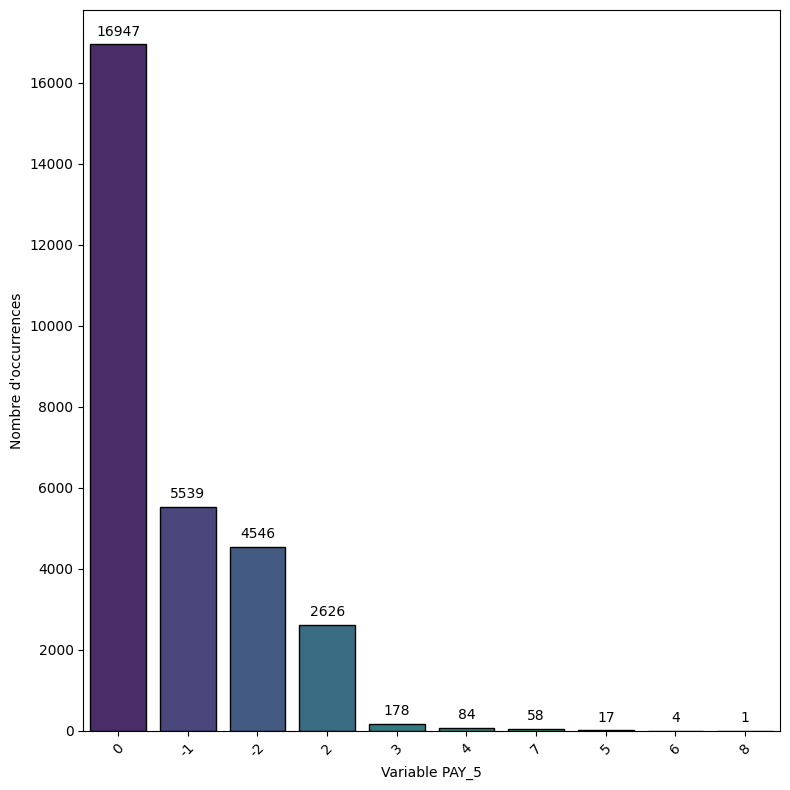

Le mode de cette variable est 0



****************************************************VARIABLE PAY_6****************************************************
  PAY_6  count   percent
0     0  16286  0.542867
1    -1   5740  0.191333
2    -2   4895  0.163167
3     2   2766    0.0922
4     3    184  0.006133
5     4     49  0.001633
6     7     46  0.001533
7     6     19  0.000633
8     5     13  0.000433
9     8      2  0.000067


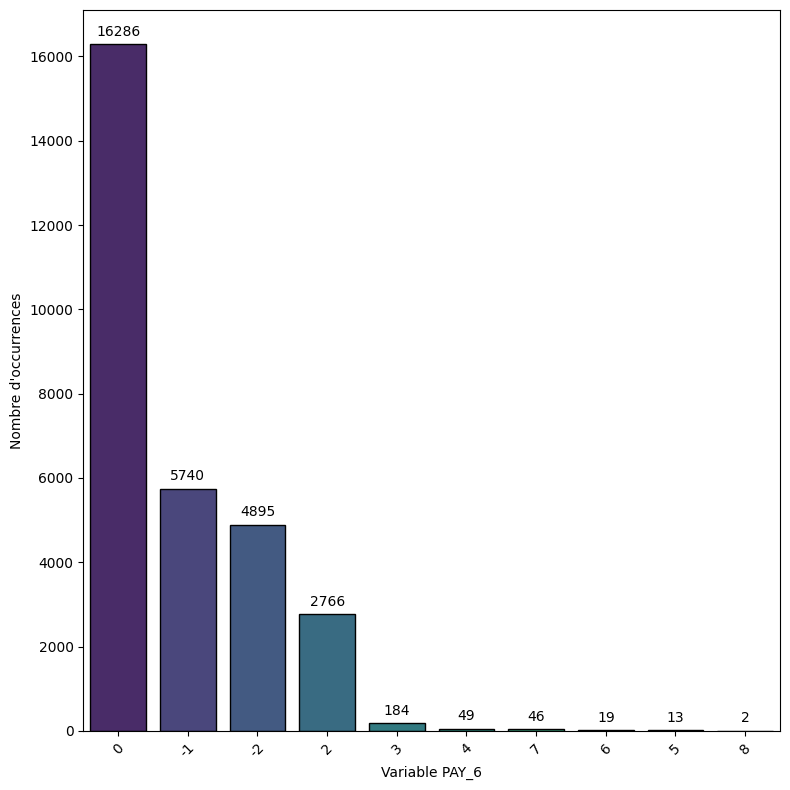

Le mode de cette variable est 0





In [15]:
for col in qual_data.columns : 
    df_counts = None
    
    print(f"****************************************************VARIABLE {col}****************************************************")
    counts = qual_data[col].value_counts(dropna=False)
    df_counts = counts.to_frame()
    df_counts = df_counts.reset_index()
    df_counts["percent"] = df_counts["count"]/len(qual_data)
    df_counts.fillna("Not_filled", axis=1, inplace=True)
    print(df_counts)
    
    plt.figure(figsize=(8, 8))
    ax = sns.barplot(df_counts, x=col, y="count", hue = col, palette='viridis', edgecolor='black')
    ax.set_xlabel(f"Variable {col}")
    ax.set_ylabel("Nombre d'occurrences")
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    df_counts.sort_values(by="count", ascending=False, inplace=True)
    mode = df_counts.loc[0, col]
    print(f"Le mode de cette variable est {mode}")
    print("\n\n")

**Comment :** <br>
- Modalities 5, 4, 6 and 0 of the variable EDUCATION are very poorly represented. It would be judicious to group them together in a single modality. The same applies to modalities 3 and 0 of the MARRIAGE variable.
- The distribution of the PAY_0, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6 categories is almost identical. For each of these variables, modalities 3, 4, 5, 6, 7 and 8 are poorly represented and it would be preferable to group them together.

In [16]:
data.replace({"EDUCATION" : ['0', '4', '5', '6']}, {"EDUCATION" : "Other"}, inplace=True)
data.replace({"MARRIAGE" : ['0', '3']}, {"MARRIAGE" : "Other"}, inplace=True)

In [17]:
for col in (['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']) : 
    data.replace({col : ['1', '2', '3', '4', '5', '6', '7', '8']}, {col : "Late_payment"}, inplace=True)
    data.replace({col : ['-1', '-2', '0']}, {col : "Pay_duly"}, inplace=True)

In [18]:
data[['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000,30000,30000,30000,30000,30000,30000,30000
unique,4,3,2,2,2,2,2,2
top,2,2,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly
freq,14030,15964,23182,25562,25787,26490,27032,26921


In [19]:
qual_data = data[["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
qual_data

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,Late_payment,Late_payment,Pay_duly,Pay_duly,Pay_duly,Pay_duly
1,2,2,2,Pay_duly,Late_payment,Pay_duly,Pay_duly,Pay_duly,Late_payment
2,2,2,2,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly
3,2,2,1,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly
4,1,2,1,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly
...,...,...,...,...,...,...,...,...,...
29995,1,3,1,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly
29996,1,3,2,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly
29997,1,2,2,Late_payment,Late_payment,Late_payment,Pay_duly,Pay_duly,Pay_duly
29998,1,3,1,Late_payment,Pay_duly,Pay_duly,Pay_duly,Pay_duly,Pay_duly


****************************************************VARIABLE SEX****************************************************
  SEX  count   percent
0   2  18112  0.603733
1   1  11888  0.396267


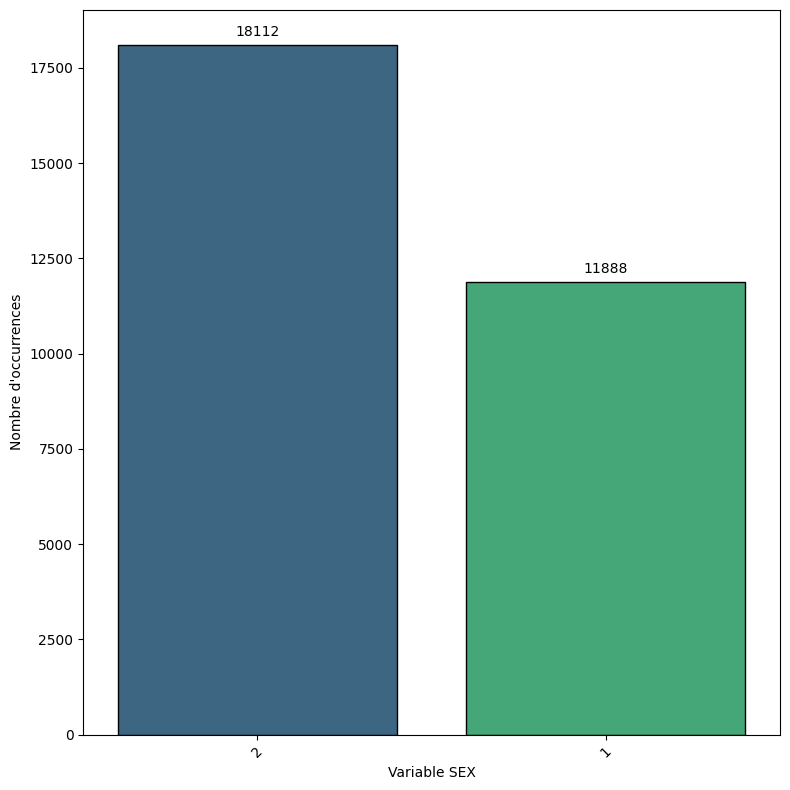

Le mode de cette variable est 2



****************************************************VARIABLE EDUCATION****************************************************
  EDUCATION  count   percent
0         2  14030  0.467667
1         1  10585  0.352833
2         3   4917    0.1639
3     Other    468    0.0156


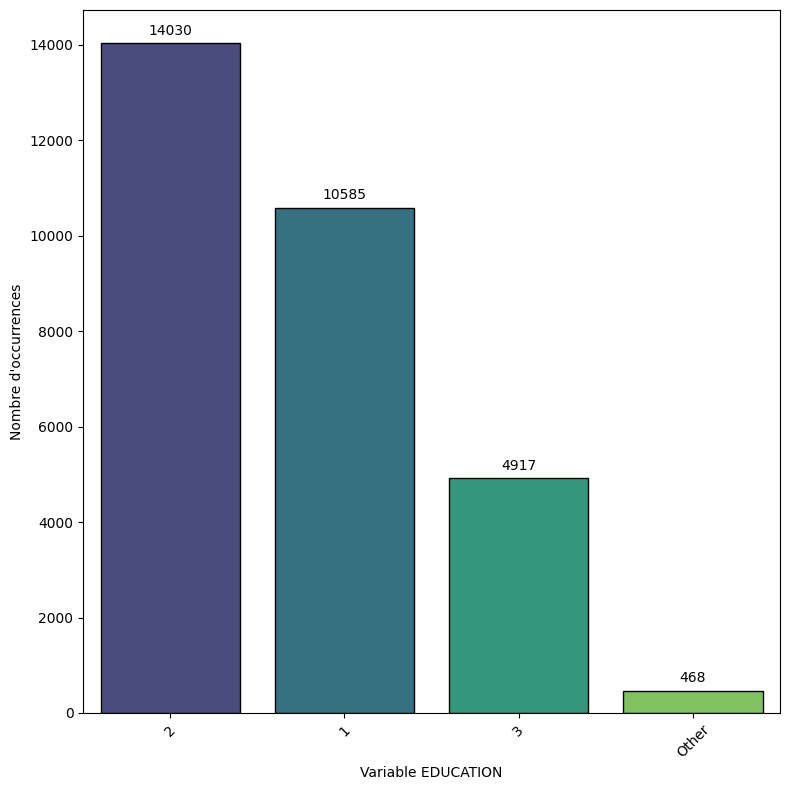

Le mode de cette variable est 2



****************************************************VARIABLE MARRIAGE****************************************************
  MARRIAGE  count   percent
0        2  15964  0.532133
1        1  13659    0.4553
2    Other    377  0.012567


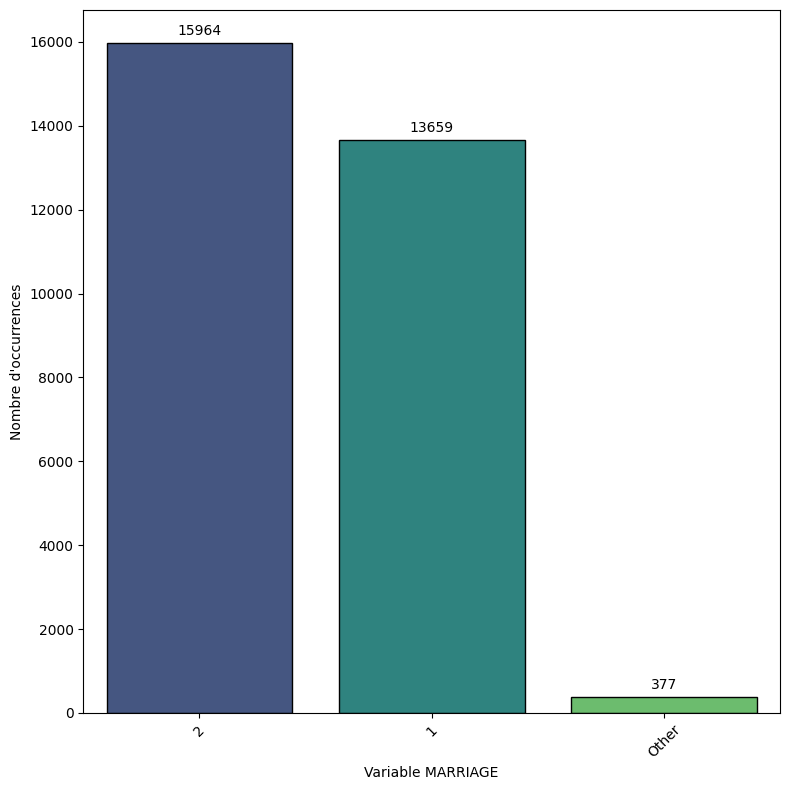

Le mode de cette variable est 2



****************************************************VARIABLE PAY_0****************************************************
          PAY_0  count   percent
0      Pay_duly  23182  0.772733
1  Late_payment   6818  0.227267


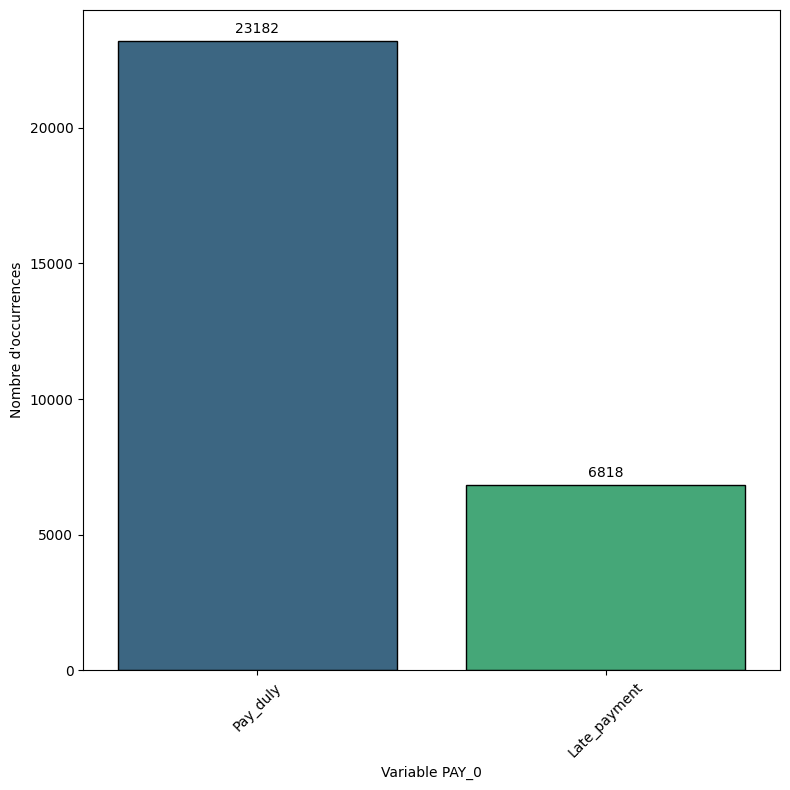

Le mode de cette variable est Pay_duly



****************************************************VARIABLE PAY_2****************************************************
          PAY_2  count   percent
0      Pay_duly  25562  0.852067
1  Late_payment   4438  0.147933


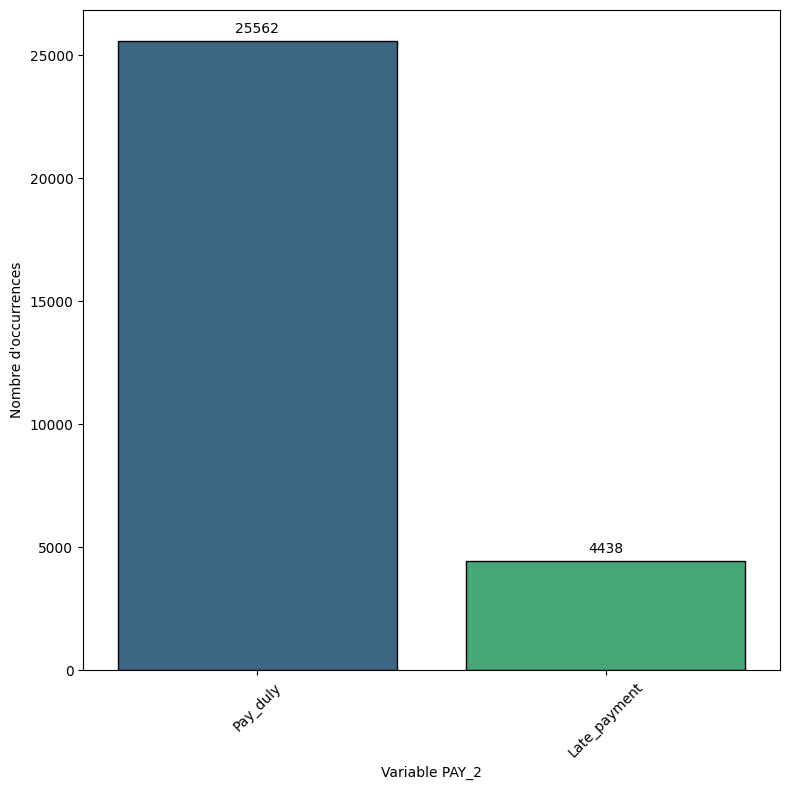

Le mode de cette variable est Pay_duly



****************************************************VARIABLE PAY_3****************************************************
          PAY_3  count   percent
0      Pay_duly  25787  0.859567
1  Late_payment   4213  0.140433


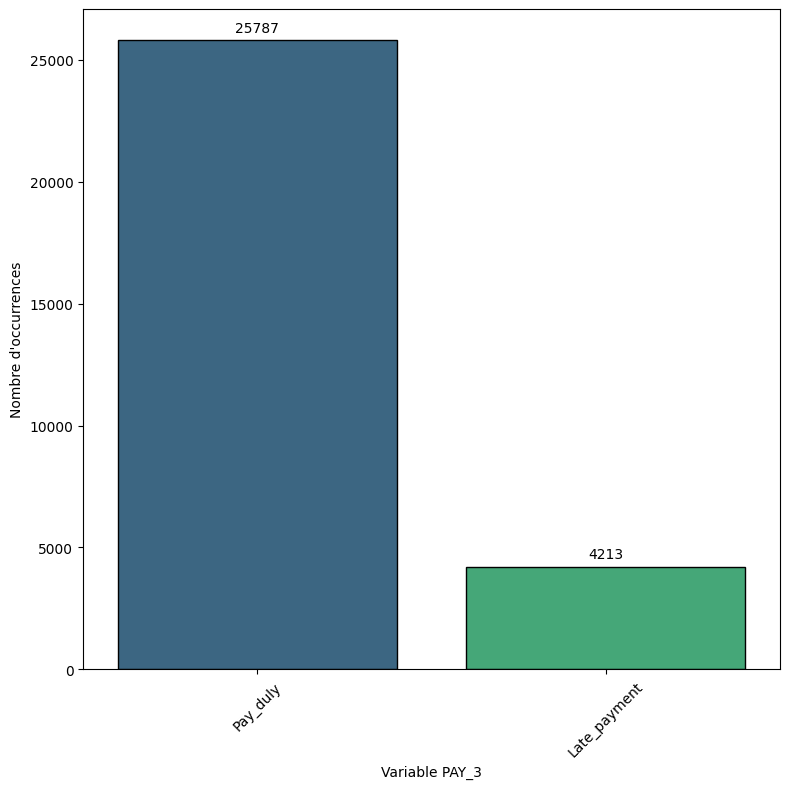

Le mode de cette variable est Pay_duly



****************************************************VARIABLE PAY_4****************************************************
          PAY_4  count percent
0      Pay_duly  26490   0.883
1  Late_payment   3510   0.117


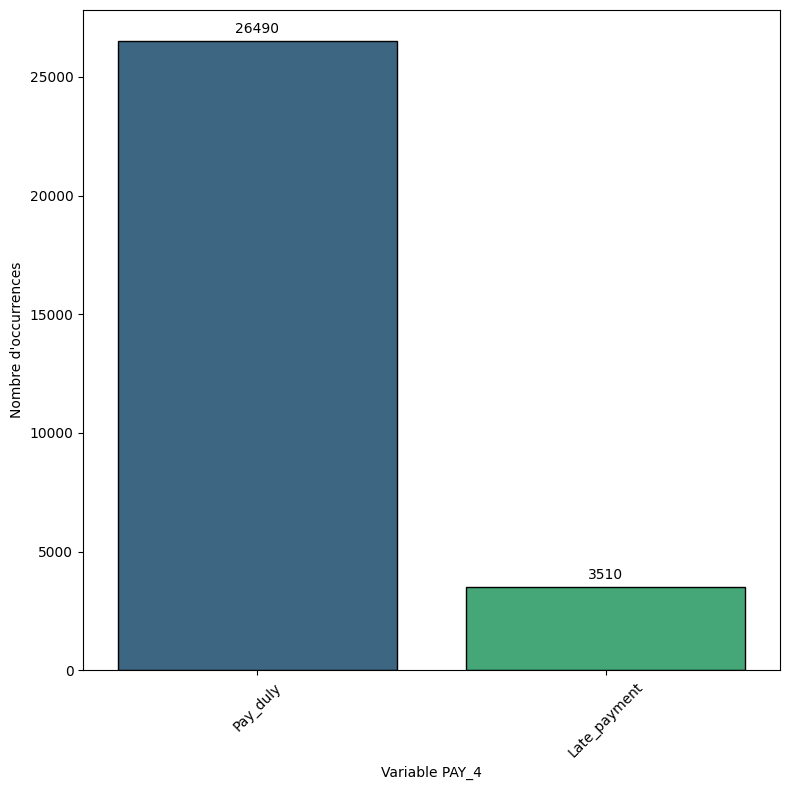

Le mode de cette variable est Pay_duly



****************************************************VARIABLE PAY_5****************************************************
          PAY_5  count   percent
0      Pay_duly  27032  0.901067
1  Late_payment   2968  0.098933


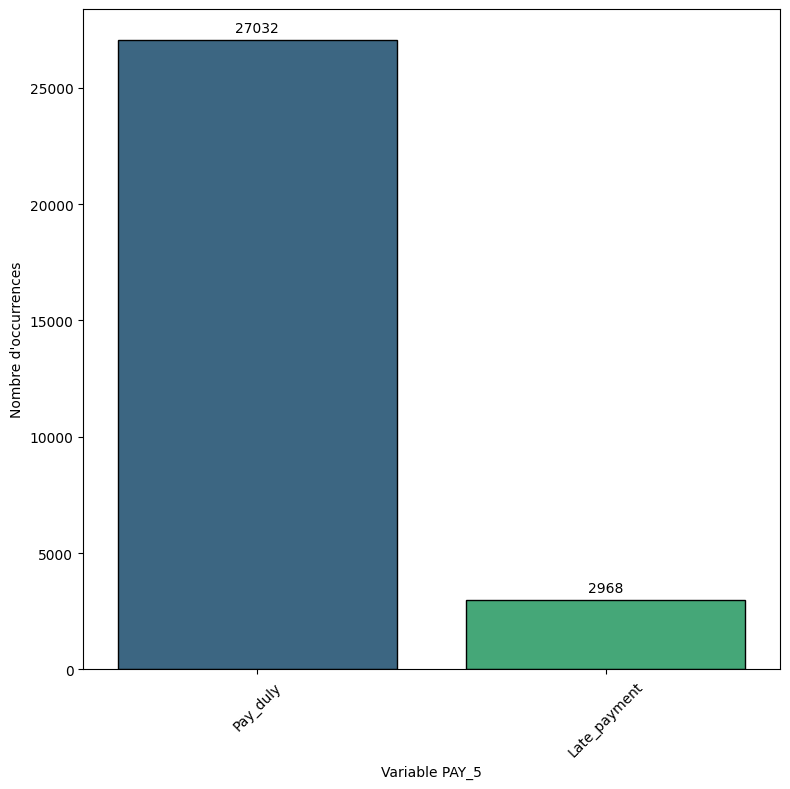

Le mode de cette variable est Pay_duly



****************************************************VARIABLE PAY_6****************************************************
          PAY_6  count   percent
0      Pay_duly  26921  0.897367
1  Late_payment   3079  0.102633


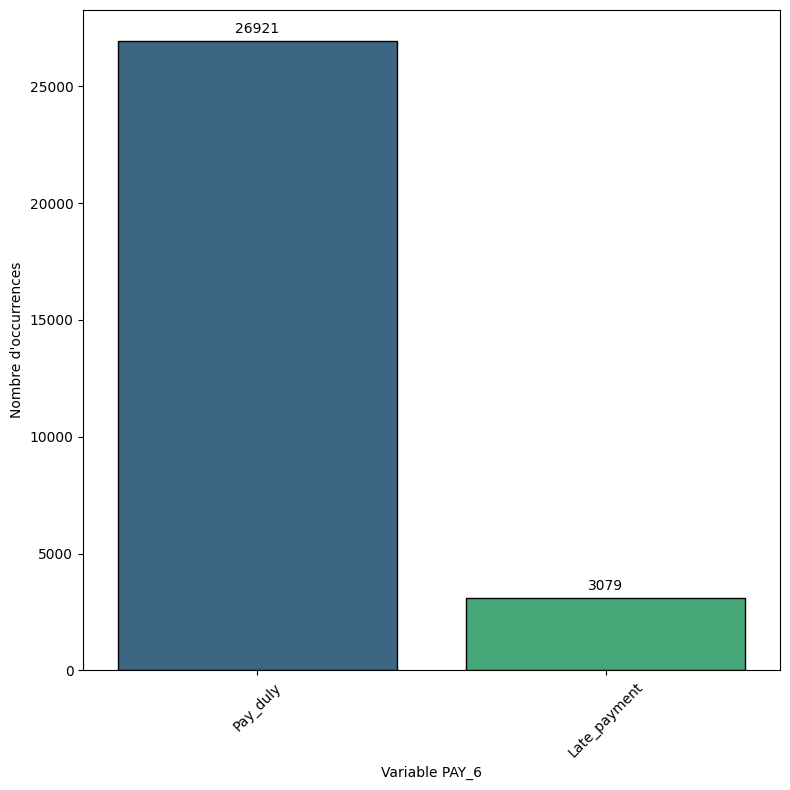

Le mode de cette variable est Pay_duly





In [20]:
for col in qual_data.columns : 
    df_counts = None
    
    print(f"****************************************************VARIABLE {col}****************************************************")
    counts = qual_data[col].value_counts(dropna=False)
    df_counts = counts.to_frame()
    df_counts = df_counts.reset_index()
    df_counts["percent"] = df_counts["count"]/len(qual_data)
    df_counts.fillna("Not_filled", axis=1, inplace=True)
    print(df_counts)
    
    plt.figure(figsize=(8, 8))
    ax = sns.barplot(df_counts, x=col, y="count", hue = col, palette='viridis', edgecolor='black')
    ax.set_xlabel(f"Variable {col}")
    ax.set_ylabel("Nombre d'occurrences")
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    df_counts.sort_values(by="count", ascending=False, inplace=True)
    mode = df_counts.loc[0, col]
    print(f"Le mode de cette variable est {mode}")
    print("\n\n")

## Quantitative variables analysis

In [23]:
numeric_vars = data.select_dtypes(include=['number'])
numeric_vars.drop("ID", axis=1, inplace=True)
numeric_vars

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [25]:
stats_summary = numeric_vars.describe().T
stats_summary['median'] = numeric_vars.median()
stats_summary

,count,mean,std,min,25%,50%,75%,max,median
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0,140000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0,34.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0,22381.5
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0,21200.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0,20088.5
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0,19052.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0,18104.5
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0,17071.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0,2100.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0,2009.0


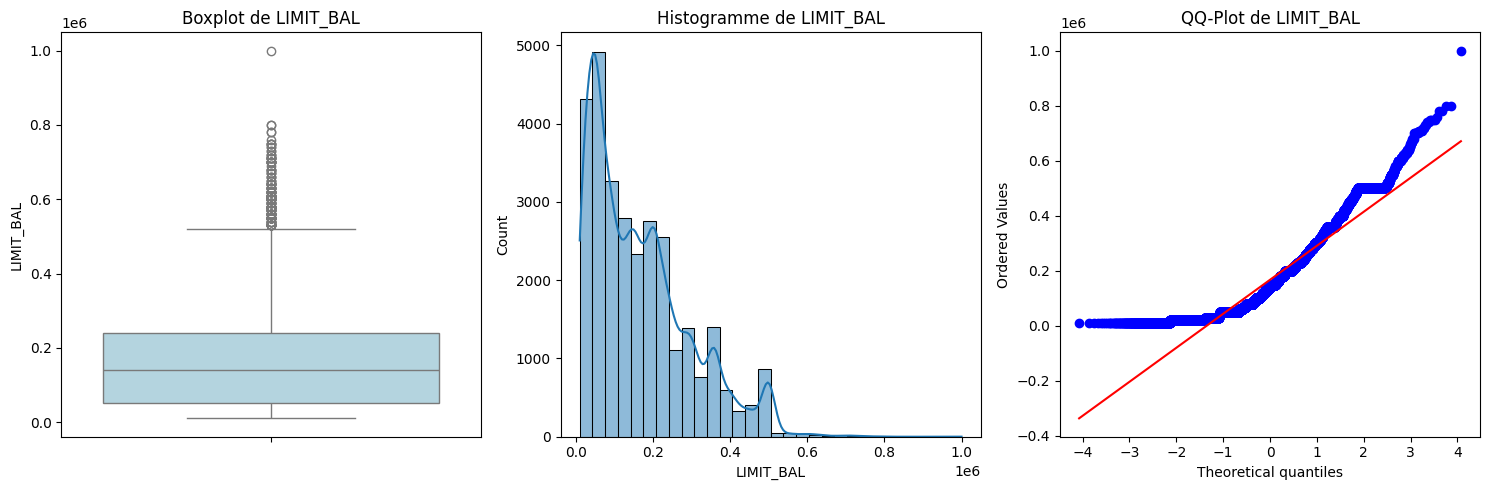

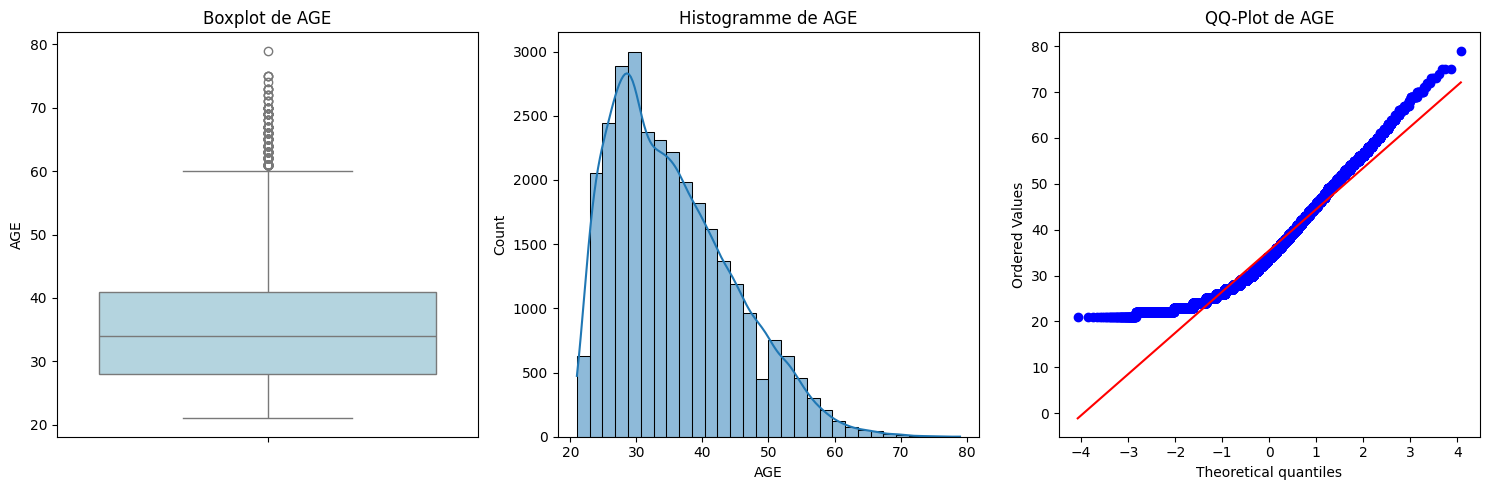

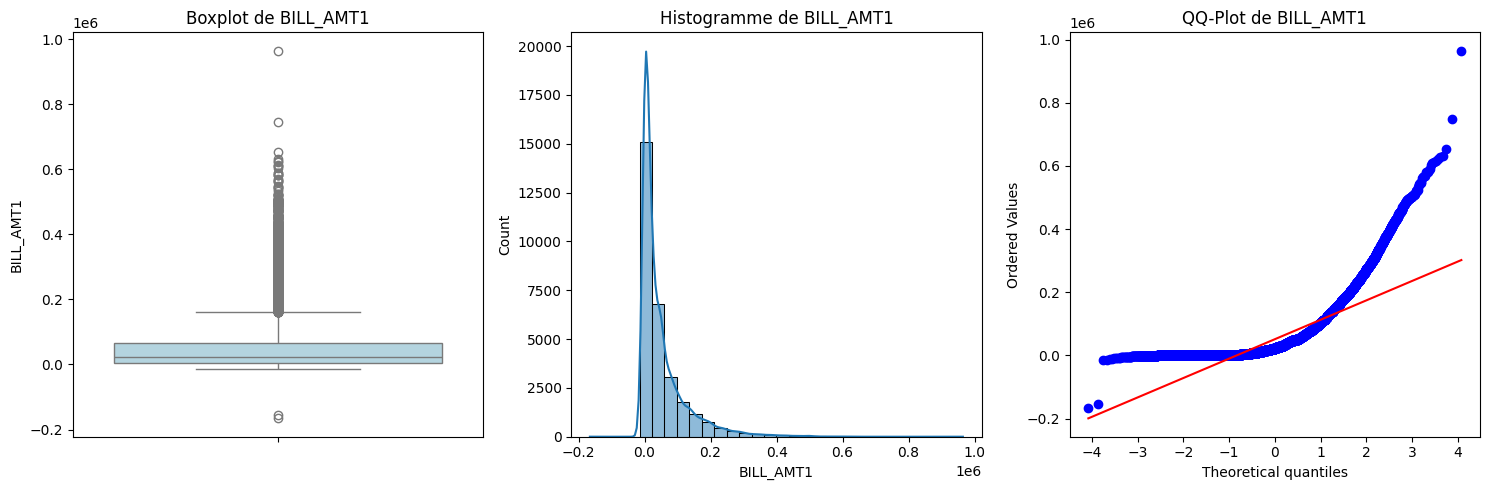

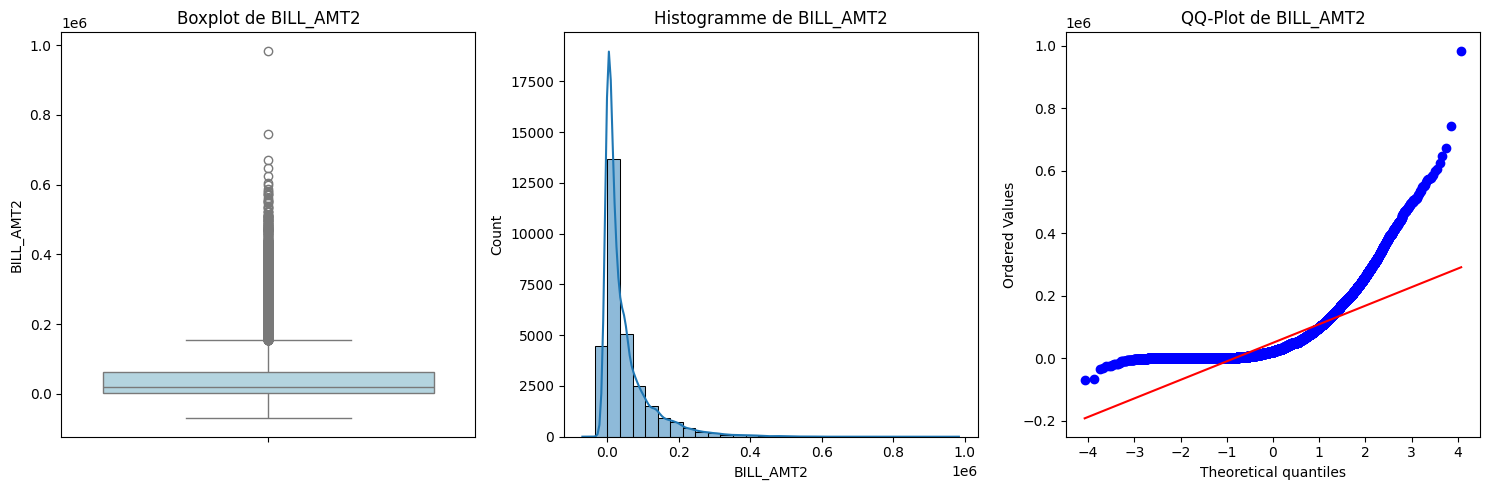

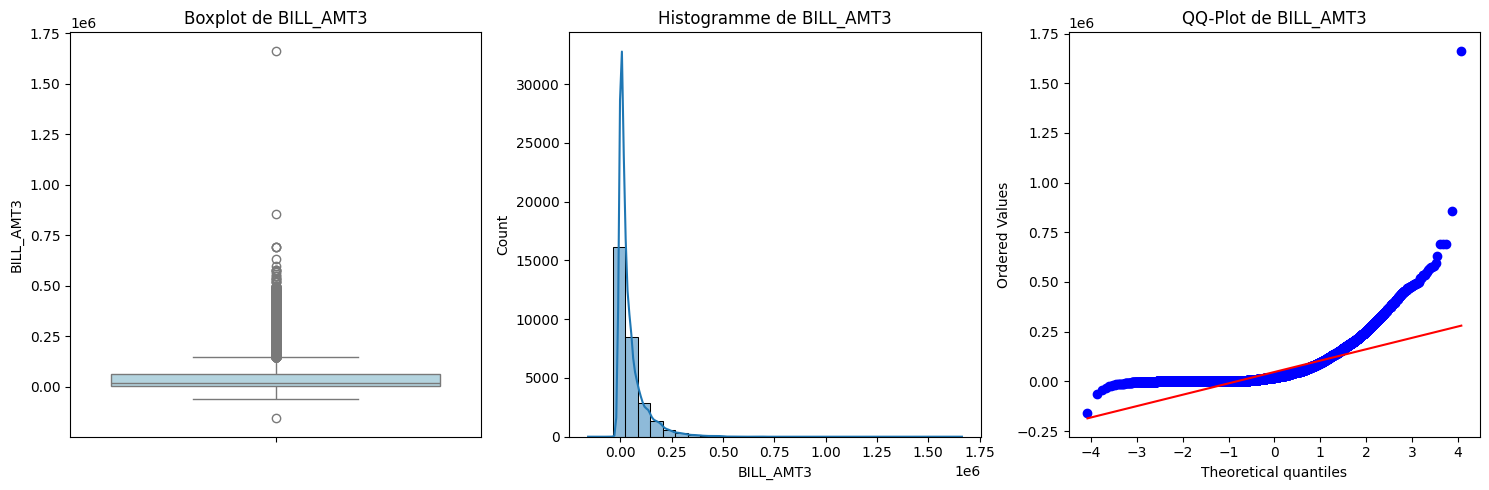

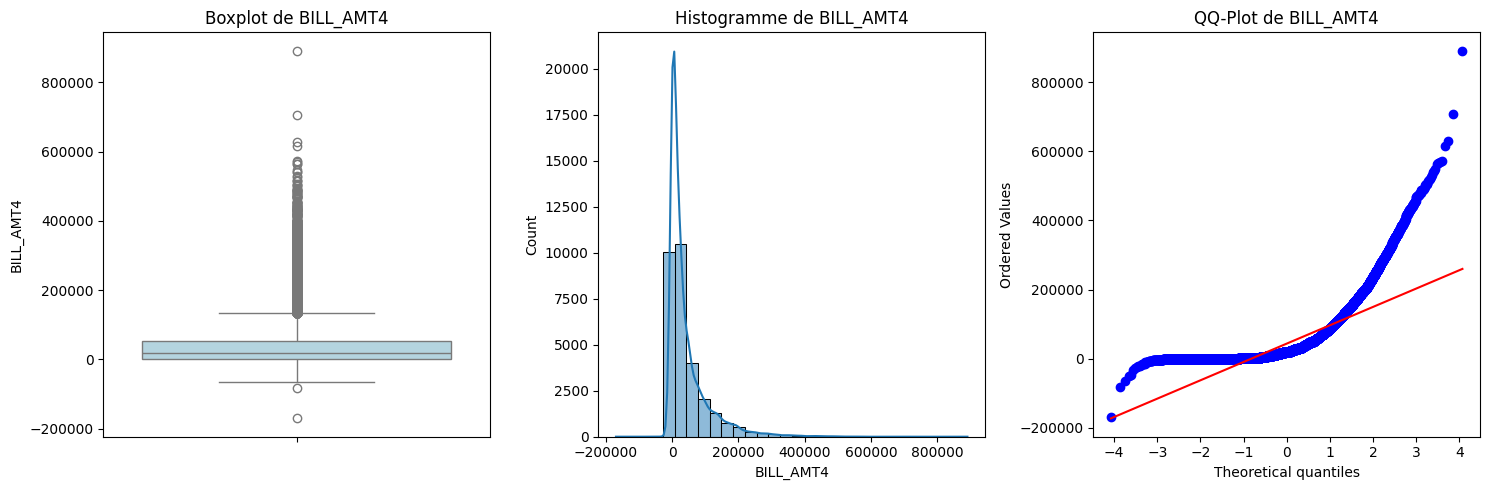

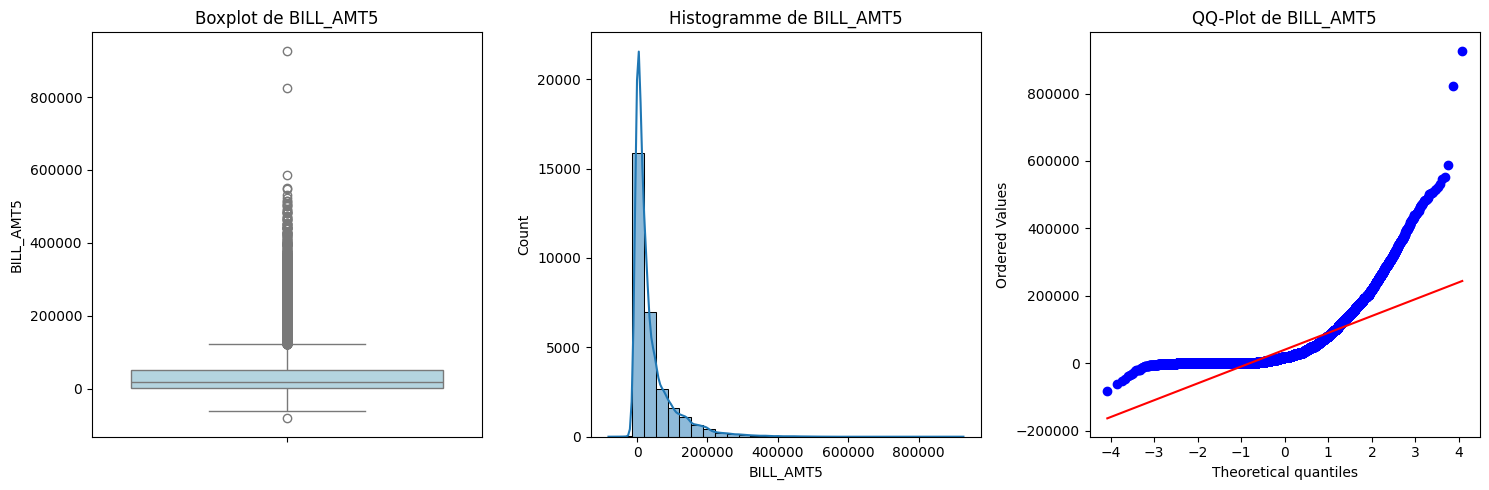

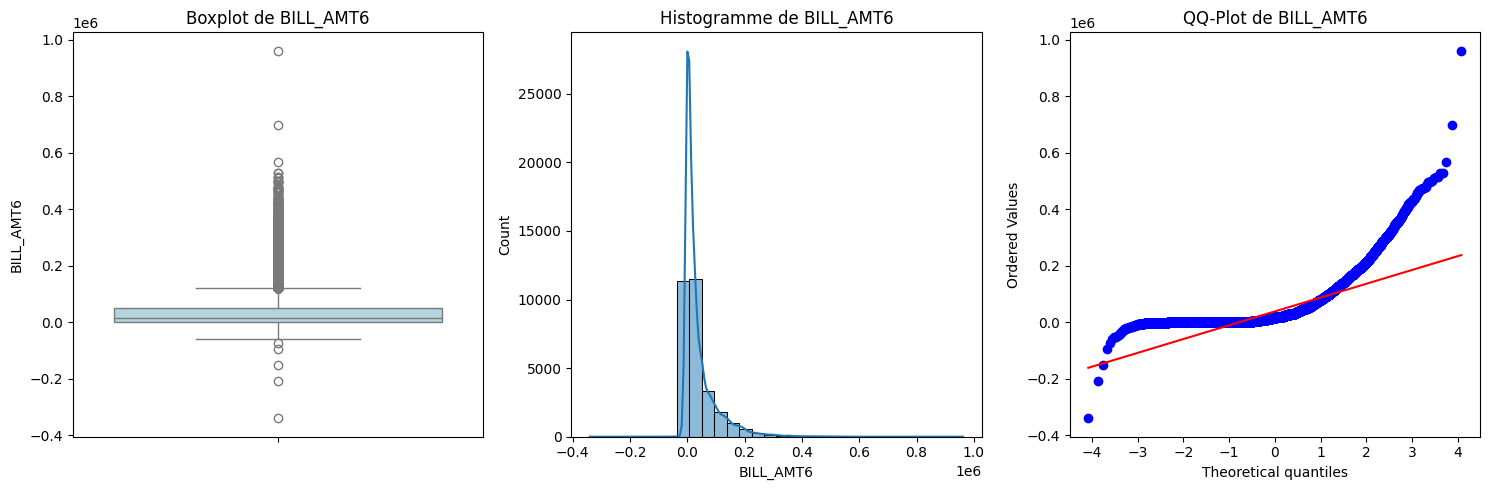

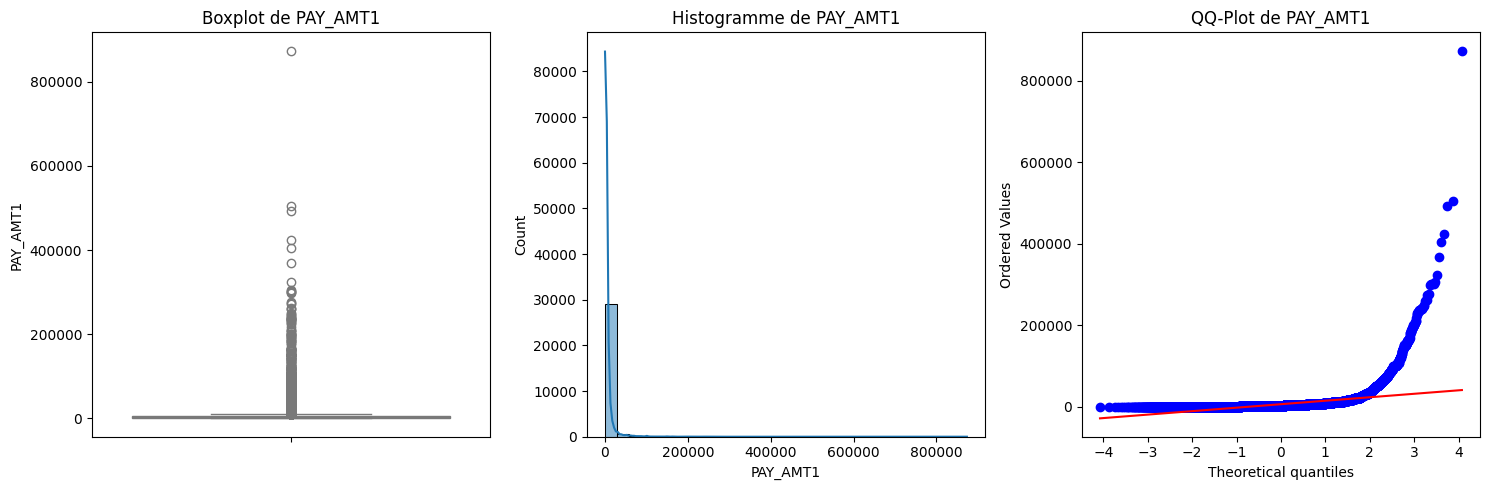

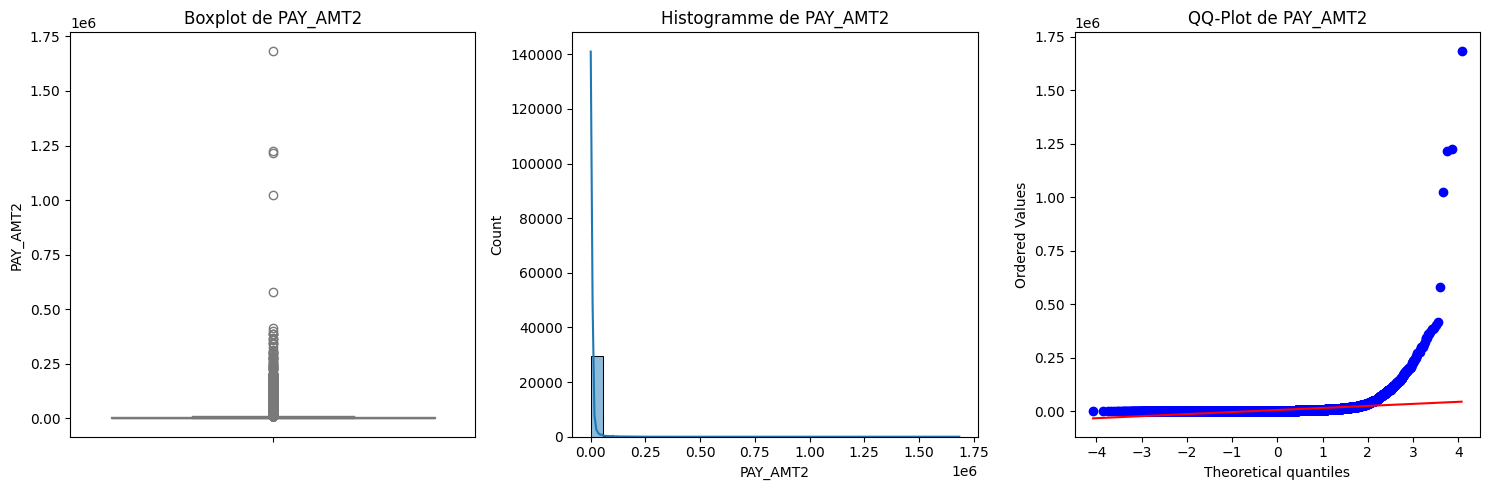

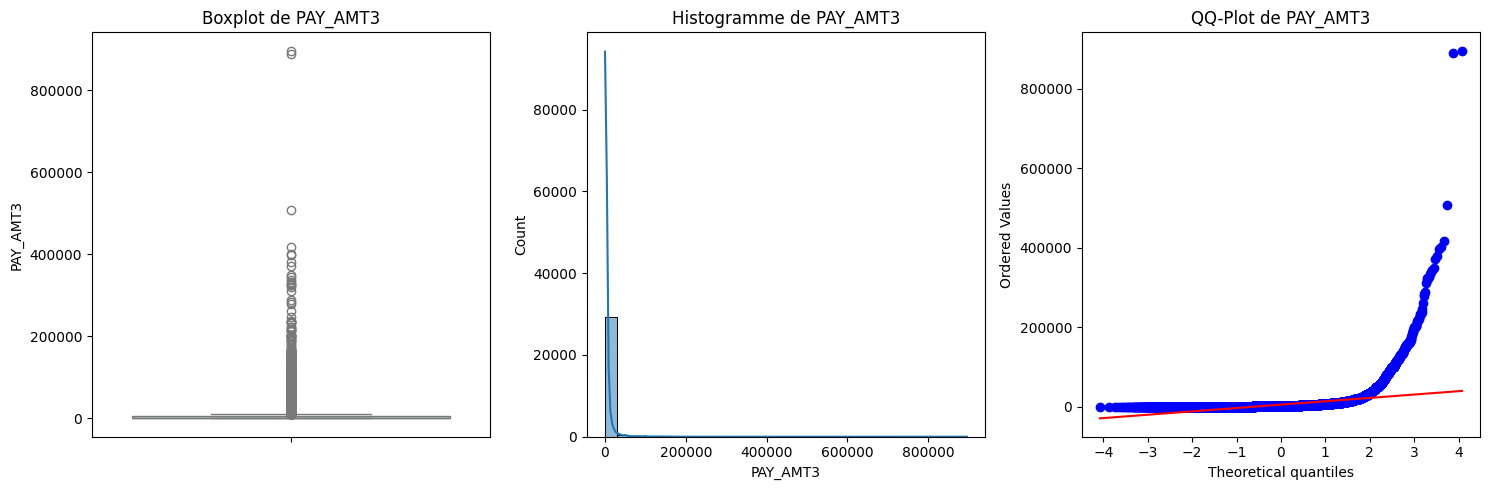

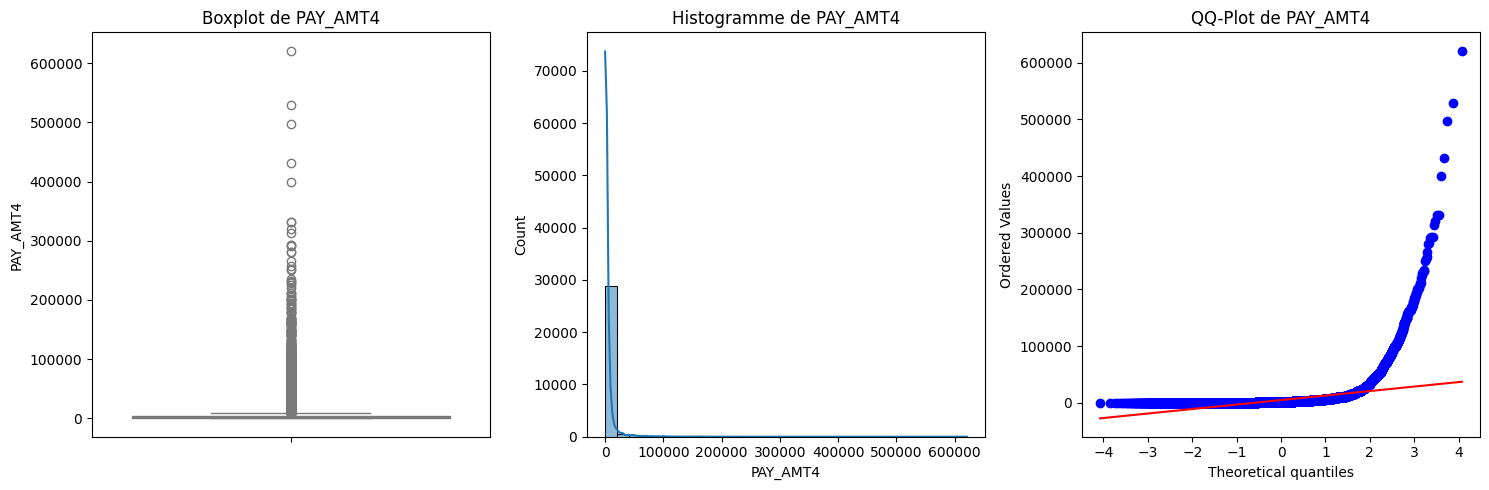

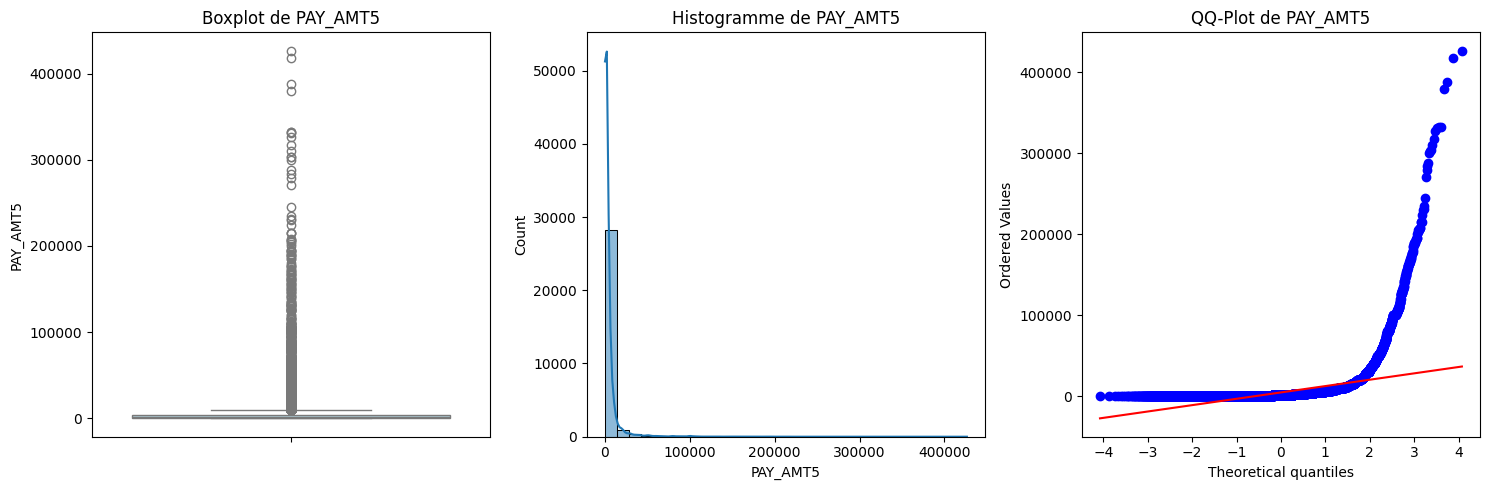

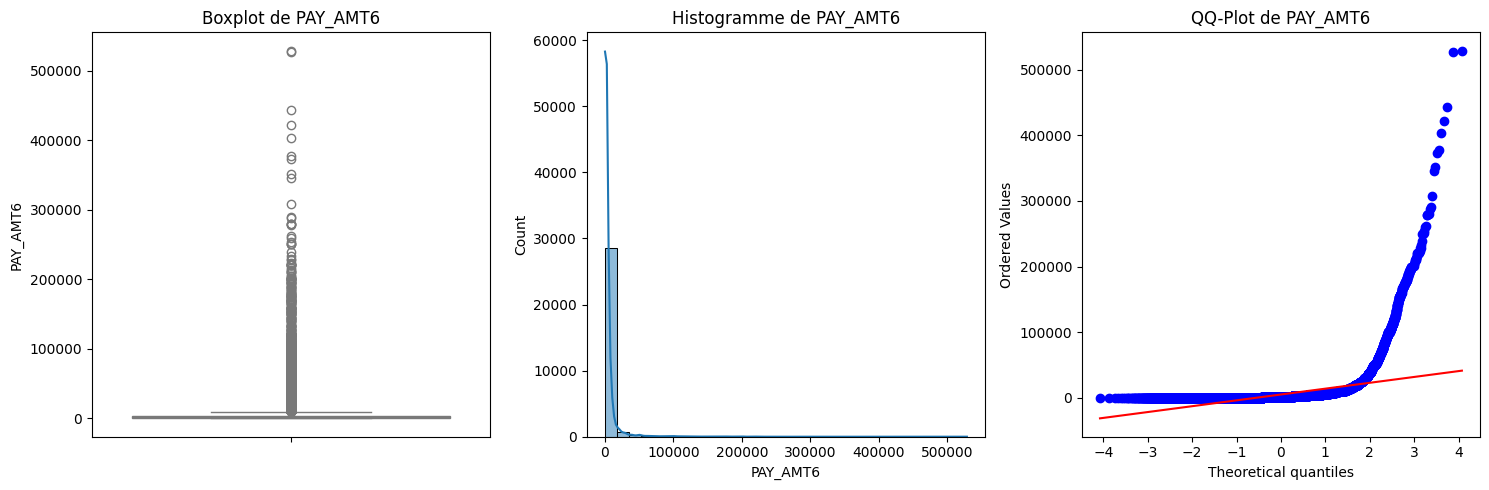

In [28]:
for col in numeric_vars.columns:
    plt.figure(figsize=(15, 5))
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(y=numeric_vars[col], color='lightblue')
    plt.title(f'Boxplot de {col}')
    
    # Histogramme
    plt.subplot(1, 3, 2)
    sns.histplot(numeric_vars[col], bins=30, kde=True, edgecolor='black')
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    
    # QQ-Plot
    plt.subplot(1, 3, 3)
    stats.probplot(numeric_vars[col].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ-Plot de {col}')
    
    plt.tight_layout()
    plt.show()

**Comment :** <br>
- ***LIMIT_BAL :*** There is one extreme value (1000000 NT). The loan values are essentially between 50,000 and 240,000 NT dollars.
- ***AGE :*** Most of the population is aged between 30 and 40
- ***BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 :*** The population is highly concentrated on the left (between 0 and 50k-60k), with a few negative values and one extreme value.
- ***PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 :*** 3/4 of our customers pay less than NT$5k-6k. There are some extreme values (especially on PAY_AMT1, PAY_AMT2, PAY_AMT3)